<a href="https://colab.research.google.com/github/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/blob/main/fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####-ALGORITMO-I-

In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00



---
## 4.1 Online Fraudulent Transaction Identification (Logistic Regression Example)
---

Logistic Regression Predictions: [0 0 0 0 0 0 0 0 0]
Actual Values: [0 0 0 0 0 1 0 0 1]
Model Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         2

    accuracy                           0.78         9
   macro avg       0.39      0.50      0.44         9
weighted avg       0.60      0.78      0.68         9



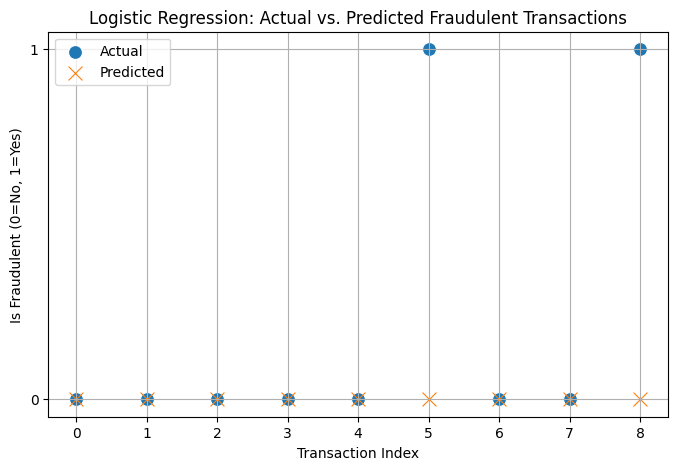


---
## 4.2 Detection of Fake Accounts and Malicious Activities (DBSCAN on IPs)
---

IP Clustering (DBSCAN):
               User_ID       IP_Address  IP_Group
0               cyoung  185.142.199.191         0
1         simpsonroger     10.211.244.0         0
2           josephvega     172.21.98.48         0
3            davismary   192.168.34.140         0
4                fbray   192.168.91.150         0
5               eric18   10.228.167.214         0
6      kristinewiggins    36.137.11.172         0
7            timothy10  192.168.138.175         0
8             mgregory   10.191.160.251         0
9              megan25  180.162.104.102         0
10        curtistucker     10.26.192.94         0
11     savagechristina     10.48.92.163         0
12        michaelbates  192.168.118.107         0
13    christinapreston     10.18.15.110         0
14          marksutton   42.173.248.139         0
15             slozano   192.168.69.207         0
16  richardsonkristina     172.23.150.7  

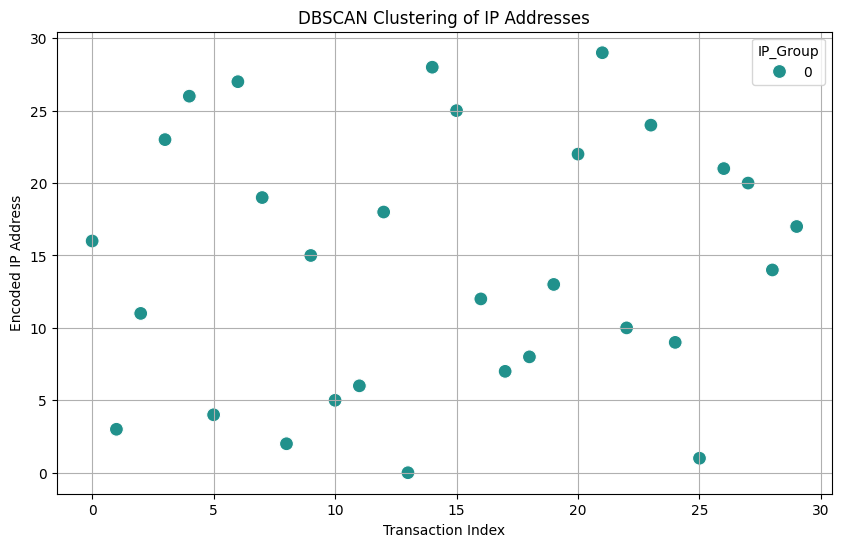


---
## 4.3 User Behavior Analysis for Fraud Detection (Conceptual Example)
---

Transaction Frequency per User:
               User_ID  Num_Transactions
0              cduncan                 1
1     christinapreston                 1
2         curtistucker                 1
3               cyoung                 1
4            davismary                 1
5               eric18                 1
6                fbray                 1
7           josephvega                 1
8             justin56                 1
9               jweber                 1
10     kristinewiggins                 1
11        lawsonedward                 1
12                lkim                 1
13              lperez                 1
14      maddoxkristina                 1
15          marksutton                 1
16              mary63                 1
17             megan25                 1
18            mgregory                 1
19        michaelbates                 1
20           micheal27    

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
import datetime

# Initialize Faker for data generation
fake = Faker()
num_records = 30

# Generate synthetic e-commerce data
data_ecommerce = {
    'Transaction_ID': range(1, num_records + 1),
    'Amount': [round(random.uniform(10, 15000), 2) for _ in range(num_records)],
    'Date_Time': [fake.date_time_between(start_date='-1y', end_date='now') for _ in range(num_records)],
    'User_ID': [fake.user_name() for _ in range(num_records)],
    'IP_Address': [fake.ipv4_private() if random.random() < 0.8 else fake.ipv4_public() for _ in range(num_records)],
    'Product': [random.choice(['Laptop', 'Book', 'T-shirt', 'Shoes', 'Television', 'Headphones', 'Backpack', 'Watch', 'Smartphone', 'Charger']) for _ in range(num_records)],
    'Is_Fraudulent': [0] * num_records  # Initialize all transactions as non-fraudulent
}

df_ecommerce = pd.DataFrame(data_ecommerce)
df_ecommerce['Date_Time'] = pd.to_datetime(df_ecommerce['Date_Time']) # Convert the column to datetime

# Mark nighttime transactions as fraudulent (example rule)
for index, row in df_ecommerce.iterrows():
    if row['Date_Time'].hour >= 21:
        df_ecommerce.at[index, 'Is_Fraudulent'] = 1

# 4.1 Online Fraudulent Transaction Identification
print("\n---")
print("## 4.1 Online Fraudulent Transaction Identification (Logistic Regression Example)")
print("---")
if 'Amount' in df_ecommerce.columns and 'Date_Time' in df_ecommerce.columns and 'Is_Fraudulent' in df_ecommerce.columns:
    # Extract temporal features
    df_ecommerce['Hour'] = df_ecommerce['Date_Time'].dt.hour
    df_ecommerce['Day_of_Week'] = df_ecommerce['Date_Time'].dt.dayofweek

    # Encode categorical variables
    # Only encode 'Product' and 'IP_Address' for features, 'User_ID' is used for behavioral analysis later
    df_encoded_transactions = pd.get_dummies(df_ecommerce, columns=['Product'], prefix='Prod', dummy_na=False)
    df_encoded_transactions = pd.get_dummies(df_encoded_transactions, columns=['IP_Address'], prefix='IP', dummy_na=False, prefix_sep='_')

    # Select features for the model
    # Filter out columns that might not exist after one-hot encoding if a category is missing
    features_transactions = ['Amount', 'Hour', 'Day_of_Week'] + \
                            [col for col in df_encoded_transactions.columns if col.startswith('Prod_')] + \
                            [col for col in df_encoded_transactions.columns if col.startswith('IP_')]

    # Ensure all selected features are actually in the DataFrame
    features_transactions = [col for col in features_transactions if col in df_encoded_transactions.columns]

    if 'Is_Fraudulent' in df_encoded_transactions.columns and all(feature in df_encoded_transactions.columns for feature in features_transactions):
        X_trans = df_encoded_transactions[features_transactions]
        y_trans = df_encoded_transactions['Is_Fraudulent']

        # Handle cases where there's only one class in y_trans
        if len(np.unique(y_trans)) < 2:
            print("\nCannot perform logistic regression: 'Is_Fraudulent' column has only one unique class.")
        else:
            X_train_trans, X_test_trans, y_train_trans, y_test_trans = train_test_split(X_trans, y_trans, test_size=0.3, random_state=42, stratify=y_trans)

            scaler_trans = StandardScaler()
            X_train_scaled_trans = scaler_trans.fit_transform(X_train_trans)
            X_test_scaled_trans = scaler_trans.transform(X_test_trans)

            model_ecommerce = LogisticRegression(random_state=42, solver='liblinear') # Use liblinear for smaller datasets
            model_ecommerce.fit(X_train_scaled_trans, y_train_trans)
            y_pred_ecommerce = model_ecommerce.predict(X_test_scaled_trans)

            print("\nLogistic Regression Predictions:", y_pred_ecommerce)
            print("Actual Values:", y_test_trans.values)
            print("Model Accuracy:", accuracy_score(y_test_trans, y_pred_ecommerce))
            print("\nClassification Report:\n", classification_report(y_test_trans, y_pred_ecommerce, target_names=list(map(str, np.unique(y_trans))), zero_division=0))

            # Plotting actual vs predicted for Logistic Regression
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x=range(len(y_test_trans)), y=y_test_trans, label='Actual', marker='o', s=100)
            sns.scatterplot(x=range(len(y_pred_ecommerce)), y=y_pred_ecommerce, label='Predicted', marker='x', s=100)
            plt.title('Logistic Regression: Actual vs. Predicted Fraudulent Transactions')
            plt.xlabel('Transaction Index')
            plt.ylabel('Is Fraudulent (0=No, 1=Yes)')
            plt.yticks([0, 1])
            plt.legend()
            plt.grid(True)
            plt.show()

    else:
        print("\nCannot perform analysis for 4.1 due to missing necessary columns or features after encoding.")
else:
    print("\nCannot perform analysis for 4.1 due to missing necessary initial columns.")

# 4.2 Detection of Fake Accounts and Malicious Activities
print("\n---")
print("## 4.2 Detection of Fake Accounts and Malicious Activities (DBSCAN on IPs)")
print("---")
if 'IP_Address' in df_ecommerce.columns:
    le_ip = LabelEncoder()
    df_ecommerce['IP_Encoded'] = le_ip.fit_transform(df_ecommerce['IP_Address'])
    ip_array = df_ecommerce[['IP_Encoded']].values
    scaler_ip = StandardScaler()
    ip_scaled = scaler_ip.fit_transform(ip_array)

    # Adjust eps based on data scale to get meaningful clusters
    # A smaller eps might result in more noise, larger eps in fewer, larger clusters
    # For scaled data, 0.5 is a common starting point, but it's often tuned.
    dbscan_ip = DBSCAN(eps=0.5, min_samples=2)
    df_ecommerce['IP_Group'] = dbscan_ip.fit_predict(ip_scaled)

    print("\nIP Clustering (DBSCAN):")
    print(df_ecommerce[['User_ID', 'IP_Address', 'IP_Group']])
    print("\nIP Groups:", df_ecommerce['IP_Group'].unique())

    # Count fraudulent transactions per IP group, excluding noise (-1)
    fraudulent_per_group = df_ecommerce[df_ecommerce['IP_Group'] != -1].groupby('IP_Group')['Is_Fraudulent'].sum()
    print("\nNumber of Fraudulent Transactions per IP Group (excluding noise):")
    print(fraudulent_per_group)

    # Plotting DBSCAN results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_ecommerce.index, y=df_ecommerce['IP_Encoded'], hue=df_ecommerce['IP_Group'], palette='viridis', legend='full', s=100)
    plt.title('DBSCAN Clustering of IP Addresses')
    plt.xlabel('Transaction Index')
    plt.ylabel('Encoded IP Address')
    plt.grid(True)
    plt.show()

else:
    print("\nCannot perform analysis for 4.2 because the 'IP_Address' column is missing.")

# 4.3 User Behavior Analysis for Fraud Detection (Conceptual Example)
print("\n---")
print("## 4.3 User Behavior Analysis for Fraud Detection (Conceptual Example)")
print("---")
if 'User_ID' in df_ecommerce.columns and 'Date_Time' in df_ecommerce.columns:
    user_frequency = df_ecommerce.groupby('User_ID')['Date_Time'].count().reset_index(name='Num_Transactions')
    print("\nTransaction Frequency per User:")
    print(user_frequency)

    frequency_threshold = 3
    high_activity_users = user_frequency[user_frequency['Num_Transactions'] >= frequency_threshold]['User_ID'].tolist()
    if high_activity_users:
        print(f"\nHigh Activity Users ({frequency_threshold} or more transactions): {high_activity_users}")
        high_activity_transactions = df_ecommerce[df_ecommerce['User_ID'].isin(high_activity_users)]
        print("\nTransactions of High Activity Users:")
        print(high_activity_transactions[['User_ID', 'Date_Time', 'Amount', 'Is_Fraudulent']])

        # Plotting transaction frequency per user
        plt.figure(figsize=(12, 6))
        sns.barplot(x='User_ID', y='Num_Transactions', hue='Num_Transactions', data=user_frequency, palette='coolwarm', dodge=False, legend=False)
        plt.title('Transaction Frequency per User')
        plt.xlabel('User ID')
        plt.ylabel('Number of Transactions')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo users with high transaction frequency were found in this example.")
else:
    print("\nCannot perform analysis for 4.3 due to missing necessary columns.")

### ALGORITMO -II-


---
## Internal Fraud Detection System (AI Model) for Expense Reports
---

Cross-Validation Accuracy: 0.7000 (+/- 0.2211)

---
### Model Evaluation on the Test Set:
---
Accuracy: 0.8888888888888888

Classification Report:
                 precision    recall  f1-score   support

Not Suspicious       1.00      0.50      0.67         2
    Suspicious       0.88      1.00      0.93         7

      accuracy                           0.89         9
     macro avg       0.94      0.75      0.80         9
  weighted avg       0.90      0.89      0.87         9


Confusion Matrix:
 [[1 1]
 [0 7]]


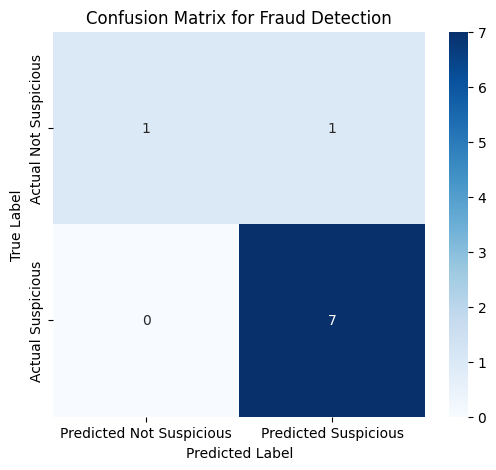

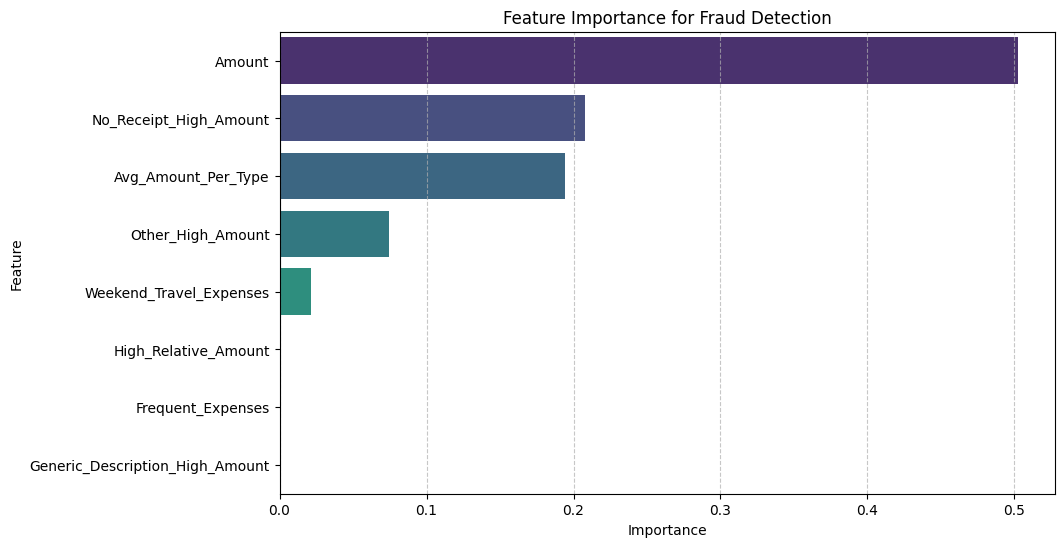

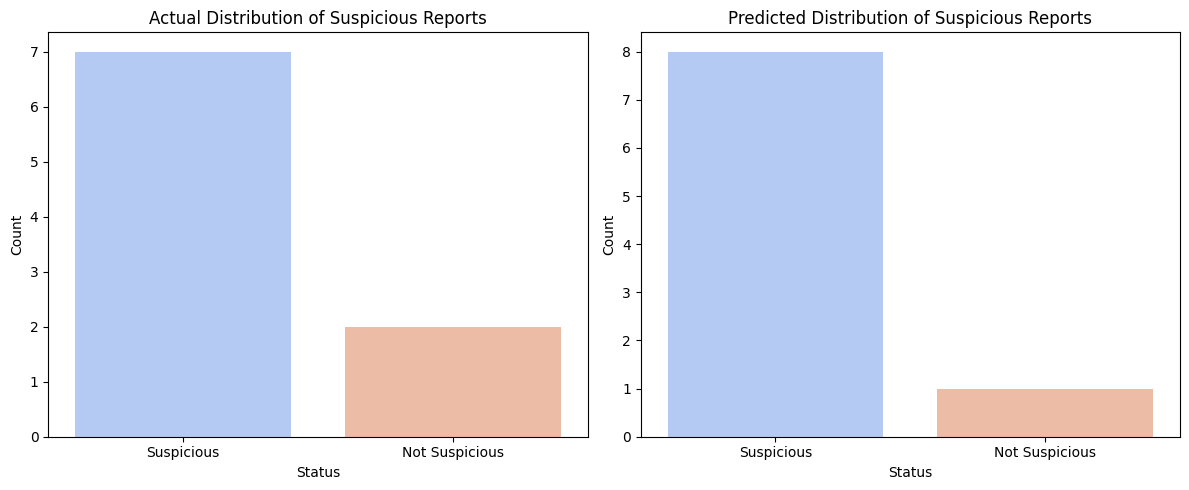

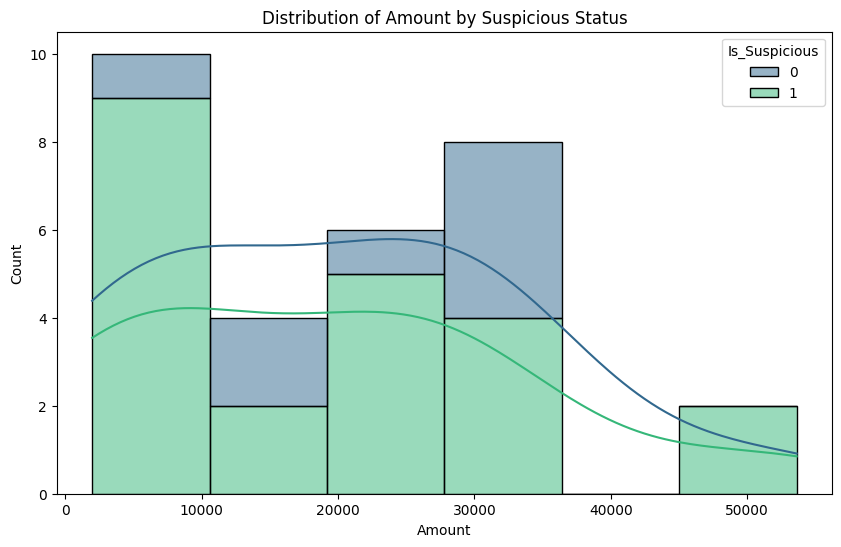


---
### Example of how the System could identify suspicious expense reports:
---

Expense Reports Marked as Suspicious by the System:
    Report_ID Submission_Date          Employee  Department     Expense_Type  \
22         23      2024-08-13       James Young  Purchasing  Travel Expenses   
15         16      2025-02-08    Kristen Larson          HR            Other   
24         25      2024-10-09       Marcus Tran       Sales            Lunch   
4           5      2024-11-16  Kathryn Fletcher     Finance            Other   
26         27      2024-06-12         Lisa Gray          HR  Office Supplies   
25         26      2024-10-11       Marcus Tran  Purchasing            Lunch   
7           8      2024-08-26    Ashley Charles  Purchasing  Office Supplies   
9          10      2024-12-06      Lori Sanchez   Marketing  Office Supplies   

          Amount Receipt_Attached Approval_Status  Is_Suspicious  \
22   2624.922252               No        Approved              1   
15   798

In [9]:
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

import pandas as pd
import numpy as np
import random
from datetime import timedelta, datetime # For date generation

# Import Faker for realistic data generation
from faker import Faker

# Scikit-learn imports for model building and evaluation
from sklearn.model_selection import (
    cross_val_score,
    StratifiedKFold,
    train_test_split,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
)

# Matplotlib and Seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Generation ---

# Initialize Faker with an explicit English locale.
# This ensures that employee names are generated in English.
# You can use 'en_US' for American English, 'en_GB' for British English, or 'en' for generic English.
fake = Faker('en_US')

# Number of expense reports to simulate
num_reports = 30 # This variable will be used consistently throughout the script

# Generate random amounts for expense reports
amounts = np.random.uniform(1000, 50000, num_reports)
# Format amounts to two decimal places (as strings initially)
formatted_amounts = ["{:.2f}".format(amount) for amount in amounts]

# Create a dictionary to hold the simulated data for expense reports
data_expense_reports = {
    'Report_ID': range(1, num_reports + 1),
    # Generate submission dates within the last year
    'Submission_Date': pd.to_datetime([fake.date_between(start_date='-365d', end_date='today') for _ in range(num_reports)]),
    # Generate English employee names using Faker
    'Employee': [fake.name() for _ in range(num_reports)],
    # Randomly assign departments
    'Department': [random.choice(['Sales', 'Marketing', 'Purchasing', 'HR', 'Finance']) for _ in range(num_reports)],
    # Randomly assign expense types
    'Expense_Type': [random.choice(['Travel Expenses', 'Office Supplies', 'Lunch', 'Transportation', 'Other']) for _ in range(num_reports)],
    # Randomly assign generic descriptions
    'Description': [random.choice(['expenses', 'travel_expenses', 'purchases', 'general_expenses', 'client_lunch', 'transport_cost']) for _ in range(num_reports)],
    'Amount': formatted_amounts, # Use the formatted amounts
    # Randomly assign receipt attachment status
    'Receipt_Attached': [random.choice(['Yes', 'No', 'Partial']) for _ in range(num_reports)],
    # Randomly assign approval status
    'Approval_Status': [random.choice(['Approved', 'Pending', 'Rejected']) for _ in range(num_reports)],
    # Initialize 'Is_Suspicious' column with zeros (will be updated later)
    'Is_Suspicious': np.zeros(num_reports, dtype=int)
}

# Create the DataFrame from the simulated data
df_expense_reports = pd.DataFrame(data_expense_reports)

# Convert 'Submission_Date' to datetime objects (ensure correct type for date operations)
df_expense_reports["Submission_Date"] = pd.to_datetime(df_expense_reports["Submission_Date"])
# Convert 'Amount' to numeric type (float) for calculations
df_expense_reports["Amount"] = pd.to_numeric(df_expense_reports["Amount"])

# --- 2. Simulate Internal Fraud Cases ---

# Initial marking of suspicious reports based on predefined rules:
# An expense is marked as suspicious (1) if no receipt is attached OR if its approval status is 'Rejected'.
df_expense_reports['Is_Suspicious'] = np.where(
    (df_expense_reports['Receipt_Attached'] == 'No') | (df_expense_reports['Approval_Status'] == 'Rejected'),
    1, # Mark as suspicious
    0  # Mark as not suspicious
)

# Inject more suspicious cases based on a percentage to create a more balanced dataset for the model.
# This adds more "true" suspicious cases beyond the initial rule-based ones.
num_additional_suspicious = int(num_reports * 0.07) # Approximately 7% of total reports
current_suspicious_indices = df_expense_reports[df_expense_reports['Is_Suspicious'] == 1].index.tolist()

# Select additional indices for suspicious cases, ensuring they are not already marked.
potential_indices = [i for i in df_expense_reports.index if i not in current_suspicious_indices]
if len(potential_indices) > 0: # Check if there are non-suspicious records to select from
    additional_suspicious_indices = np.random.choice(
        potential_indices, min(num_additional_suspicious, len(potential_indices)), replace=False
    )
    df_expense_reports.loc[additional_suspicious_indices, "Is_Suspicious"] = 1

# Introduce specific fraud patterns for the injected suspicious cases (simplified scenarios)
# This adds more realistic characteristics to the 'suspicious' data points.
for idx in df_expense_reports[df_expense_reports['Is_Suspicious'] == 1].index:
    # Scenario 1: Duplicate or very close expenses (20% chance for a suspicious report)
    # Simulates an employee submitting similar expenses multiple times.
    if random.random() < 0.2 and idx + 1 < len(df_expense_reports):
        df_expense_reports.loc[idx + 1, "Submission_Date"] = df_expense_reports.loc[idx, "Submission_Date"] + timedelta(days=random.randint(0, 2))
        df_expense_reports.loc[idx + 1, "Employee"] = df_expense_reports.loc[idx, "Employee"]
        df_expense_reports.loc[idx + 1, "Expense_Type"] = df_expense_reports.loc[idx, "Expense_Type"]
        df_expense_reports.loc[idx + 1, "Amount"] = df_expense_reports.loc[idx, "Amount"] * random.uniform(0.9, 1.1)
        df_expense_reports.loc[idx + 1, "Is_Suspicious"] = 1 # Mark the duplicated one as suspicious too

    # Scenario 2: "Other" expense type with high amount (15% chance)
    # Flags unusually high amounts in a generic "Other" category.
    if random.random() < 0.15:
        df_expense_reports.loc[idx, "Expense_Type"] = "Other"
        df_expense_reports.loc[idx, "Amount"] = np.random.uniform(5000, 15000)

    # Scenario 3: No receipt for significant amount (15% chance)
    # Highlights missing documentation for substantial expenses.
    if random.random() < 0.15:
        df_expense_reports.loc[idx, "Receipt_Attached"] = "No"
        df_expense_reports.loc[idx, "Amount"] = np.random.uniform(1000, 5000)

    # Scenario 4: Travel expenses on weekends (10% chance)
    # Catches travel claims made during non-business days.
    if random.random() < 0.1:
        df_expense_reports.loc[idx, "Expense_Type"] = "Travel Expenses"
        # Force a weekend date if it's not already
        current_date = df_expense_reports.loc[idx, "Submission_Date"]
        if current_date.weekday() < 5: # If not Saturday (5) or Sunday (6)
            # Move to the nearest Saturday or Sunday
            df_expense_reports.loc[idx, "Submission_Date"] = current_date + timedelta(days=random.choice([5 - current_date.weekday(), 6 - current_date.weekday()]))

# --- 3. Feature Engineering for Internal Fraud Detection ---
# Create new features that could be indicative of fraud

# a) Amount Relative to Average by Expense Type
# Calculates if an expense amount is significantly higher than the average for its type.
df_expense_reports["Avg_Amount_Per_Type"] = df_expense_reports.groupby("Expense_Type")["Amount"].transform("mean")
df_expense_reports["High_Relative_Amount"] = np.where(
    df_expense_reports["Amount"] > df_expense_reports["Avg_Amount_Per_Type"] * 2.5, 1, 0
)

# b) Absence of Receipt for Significant Amounts
# Flags expenses with no receipt attached that exceed a certain threshold.
receipt_threshold = 200
df_expense_reports["No_Receipt_High_Amount"] = np.where(
    (df_expense_reports["Receipt_Attached"] == "No")
    & (df_expense_reports["Amount"] > receipt_threshold),
    1,
    0,
)

# c) "Other" Expenses with High Amount
# Identifies potentially suspicious large expenses categorized generically as "Other".
other_amount_threshold = 500
df_expense_reports["Other_High_Amount"] = np.where(
    (df_expense_reports["Expense_Type"] == "Other")
    & (df_expense_reports["Amount"] > other_amount_threshold),
    1,
    0,
)

# d) Expense Frequency per Employee (e.g., Many expenses in a short time)
# Detects if an employee is submitting an unusually high number of reports on a given day.
df_expense_reports["Truncated_Date"] = df_expense_reports["Submission_Date"].dt.date
employee_frequency = (
    df_expense_reports.groupby(["Employee", "Truncated_Date"])
    .size()
    .reset_index(name="Frequency")
)

df_expense_reports = pd.merge(
    df_expense_reports,
    employee_frequency,
    on=["Employee", "Truncated_Date"],
    how="left",
)

# Check for the existence of the 'Frequency' column after merge
if "Frequency" in df_expense_reports.columns:
    df_expense_reports["Frequent_Expenses"] = (
        df_expense_reports["Frequency"] > 3 # Define threshold for "frequent"
    ).fillna(0).astype(int)
else:
    print("Error: The 'Frequency' column was not created correctly during the merge.")

# e) Travel Expenses on Weekends
# Flags travel expenses submitted for weekend dates, which might be unusual for business.
df_expense_reports["Day_of_Week"] = df_expense_reports["Submission_Date"].dt.dayofweek # 0: Monday, 6: Sunday
df_expense_reports["Weekend_Travel_Expenses"] = np.where(
    (df_expense_reports["Expense_Type"] == "Travel Expenses")
    & (df_expense_reports["Day_of_Week"] >= 5), # 5 (Saturday) or 6 (Sunday)
    1,
    0,
)

# f) Generic Description with High Amount
# Identifies high-value expenses with vague descriptions.
# Using a broader set of generic words that might appear in descriptions
generic_words = ['expenses', 'travel_expenses', 'purchases', 'general_expenses', 'client_lunch', 'transport_cost']
df_expense_reports["Generic_Description"] = df_expense_reports["Description"].apply(
    lambda x: 1
    if any(word in x.lower() for word in generic_words)
    else 0
)
generic_description_amount_threshold = 300 # Define threshold for "high amount"
df_expense_reports["Generic_Description_High_Amount"] = np.where(
    (df_expense_reports["Generic_Description"] == 1)
    & (df_expense_reports["Amount"] > generic_description_amount_threshold),
    1,
    0,
)

# --- 4. Data Preparation for the Fraud Detection Model ---

# Define the features (independent variables) to be used by the model
features = [
    "Amount",
    "High_Relative_Amount",
    "No_Receipt_High_Amount",
    "Other_High_Amount",
    "Frequent_Expenses",
    "Weekend_Travel_Expenses",
    "Generic_Description_High_Amount",
    "Avg_Amount_Per_Type", # Include mean amount per type as a feature
]
X = df_expense_reports[features] # Features DataFrame
y = df_expense_reports["Is_Suspicious"] # Target variable (Is_Suspicious)
X = X.fillna(0) # Fill any potential NaNs created by feature engineering with 0

# --- 5. Design of the Internal Fraud Detection System (AI Model) ---
print("\n---")
print("## Internal Fraud Detection System (AI Model) for Expense Reports")
print("---")

# Initialize the RandomForestClassifier model
# RandomForest is a robust ensemble method suitable for classification tasks.
model_internal_fraud_detection = RandomForestClassifier(random_state=42)

# Set up Stratified K-Fold Cross-Validation for robust model evaluation.
# StratifiedKFold ensures that the proportion of target variable (Is_Suspicious) is
# roughly the same in each fold as in the whole dataset, which is crucial for imbalanced datasets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy scores
# This gives an estimate of the model's performance on unseen data during training.
scores = cross_val_score(
    model_internal_fraud_detection, X, y, cv=cv, scoring="accuracy"
)
print(f"\nCross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

# Split the data into training and testing sets.
# test_size=0.3 means 30% of data will be used for testing.
# stratify=y ensures that the proportion of suspicious/non-suspicious cases is maintained
# in both train and test sets, preventing skewed evaluation.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the features using StandardScaler.
# This normalizes the data to have a mean of 0 and standard deviation of 1.
# Scaling is important for many machine learning algorithms, though less critical for Random Forests.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit scaler on training data and transform it
X_test_scaled = scaler.transform(X_test) # Transform test data using the same scaler (do not fit again)

# Train the Random Forest model on the scaled training data.
model_internal_fraud_detection.fit(X_train_scaled, y_train)
# Make predictions on the scaled test data.
y_pred_internal_fraud = model_internal_fraud_detection.predict(X_test_scaled)

print("\n---")
print("### Model Evaluation on the Test Set:")
print("---")
# Print overall accuracy of the model on the test set.
print("Accuracy:", accuracy_score(y_test, y_pred_internal_fraud))
print(
    "\nClassification Report:\n",
    classification_report(
        y_test,
        y_pred_internal_fraud,
        target_names=["Not Suspicious", "Suspicious"], # Labels for the target classes in the report
    ),
)
print(
    "\nConfusion Matrix:\n",
    confusion_matrix(y_test, y_pred_internal_fraud),
)

# --- 6. Visualization of Model Performance ---

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred_internal_fraud)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Suspicious', 'Predicted Suspicious'],
            yticklabels=['Actual Not Suspicious', 'Actual Suspicious'])
plt.title('Confusion Matrix for Fraud Detection')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting Feature Importance
# This shows which features contributed most to the model's predictions.
if hasattr(model_internal_fraud_detection, 'feature_importances_'):
    feature_importances = pd.DataFrame(
        {'Feature': features, 'Importance': model_internal_fraud_detection.feature_importances_})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
    plt.title('Feature Importance for Fraud Detection')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Plotting Distribution of Actual vs. Predicted Suspicious Reports
# Helps to visually compare the true class distribution with the model's predicted distribution.
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_internal_fraud})
df_results['Actual_Label'] = df_results['Actual'].map({0: 'Not Suspicious', 1: 'Suspicious'})
df_results['Predicted_Label'] = df_results['Predicted'].map({0: 'Not Suspicious', 1: 'Suspicious'})

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # First plot in a 1x2 grid
sns.countplot(x='Actual_Label', data=df_results, palette='coolwarm')
plt.title('Actual Distribution of Suspicious Reports')
plt.xlabel('Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2) # Second plot in a 1x2 grid
sns.countplot(x='Predicted_Label', data=df_results, palette='coolwarm')
plt.title('Predicted Distribution of Suspicious Reports')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

# Plotting Amount Distribution for Suspicious vs. Non-Suspicious
# Shows how the 'Amount' feature is distributed for each class, highlighting potential patterns.
plt.figure(figsize=(10, 6))
sns.histplot(data=df_expense_reports, x='Amount', hue='Is_Suspicious', kde=True, palette='viridis', multiple='stack')
plt.title('Distribution of Amount by Suspicious Status')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

# --- 7. Simulation of System Application ---
print("\n---")
print("### Example of how the System could identify suspicious expense reports:")
print("---")

# Create a copy of the test data and add the model's predictions
df_test_results = df_expense_reports.loc[X_test.index].copy()
df_test_results['Predicted_Suspicious'] = y_pred_internal_fraud

# Filter for reports that the system predicted as suspicious
suspicious_reports = df_test_results[df_test_results['Predicted_Suspicious'] == 1][
    ['Report_ID', 'Submission_Date', 'Employee', 'Department', 'Expense_Type', 'Amount',
     'Receipt_Attached', 'Approval_Status', 'Is_Suspicious', 'Predicted_Suspicious']]

if not suspicious_reports.empty:
    print("\nExpense Reports Marked as Suspicious by the System:")
    print(suspicious_reports)
    print("\nThese expense reports might require a more thorough review.")
else:
    print("\nThe system did not detect any suspicious expense reports in the simulated test set.")

# --- 8. Feature Importance Analysis (already printed above, this is for code structure consistency) ---
# This section is included for completeness, as the feature importance was already calculated and plotted.
if hasattr(model_internal_fraud_detection, 'feature_importances_'):
    print("\n---")
    print("### Analysis of Feature Importance (from RandomForestClassifier):")
    print("---")
    # The feature_importances DataFrame was already created and printed above.
    print(feature_importances)

# Save the generated DataFrame to a CSV file
csv_filename = 'df_expense_reports.csv' # Renamed for clarity
df_expense_reports.to_csv(csv_filename, index=False)

print(f"\n\nThe complete DataFrame has been successfully saved to the file '{csv_filename}'")
print("\nFirst 5 rows of the generated DataFrame (to check English names and data):")
print(df_expense_reports.head())


### ALGORITHM III-


7. Training the Model for Political Corruption Detection (Random Forest):

8. Model Evaluation:
Model Accuracy: 0.8235294117647058

Classification Report:
                 precision    recall  f1-score   support

Not Suspicious       0.87      0.93      0.90        14
    Suspicious       0.50      0.33      0.40         3

      accuracy                           0.82        17
     macro avg       0.68      0.63      0.65        17
  weighted avg       0.80      0.82      0.81        17


Confusion Matrix:
 [[13  1]
 [ 2  1]]

9. Politicians Detected as Potentially Suspicious by the System:
    Politician_ID     Full_Name  Position Political_Party  \
40             41  Emily Steele  Minister    Region Party   
10             11  Alexa Torres     Mayor    Recent Party   

    Last_Year_Asset_Declaration  Last_Year_Asset_Increase_Percentage  \
40                 1.569500e+06                             0.531148   
10                 2.107420e+05                             0.200000   

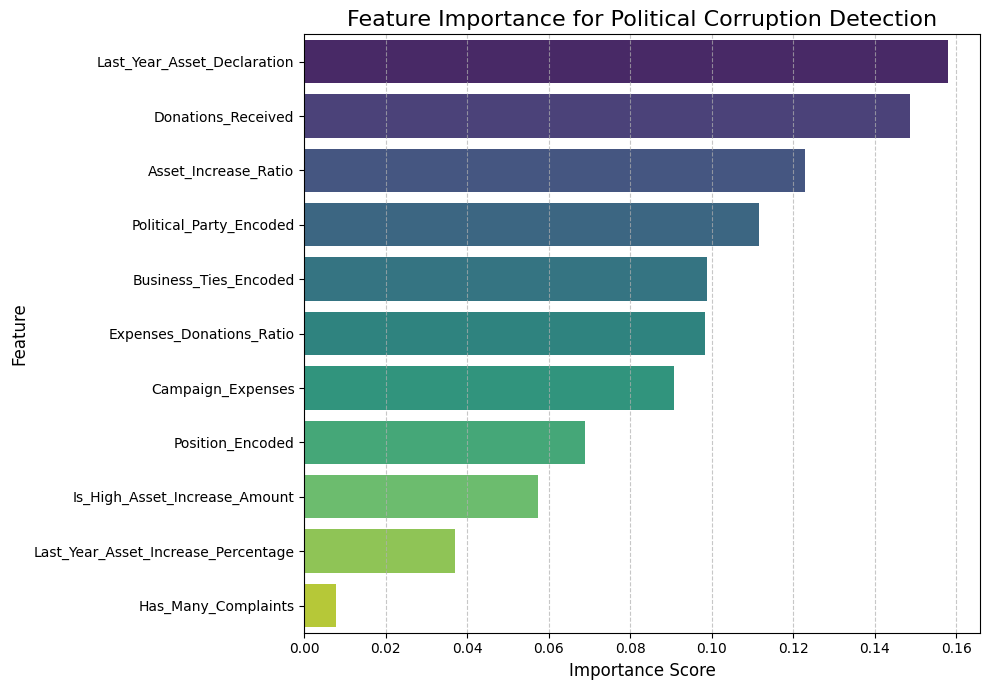

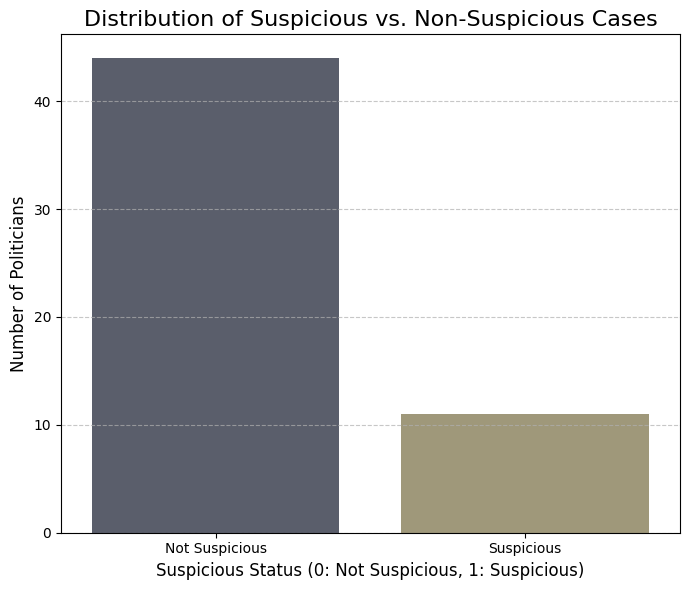

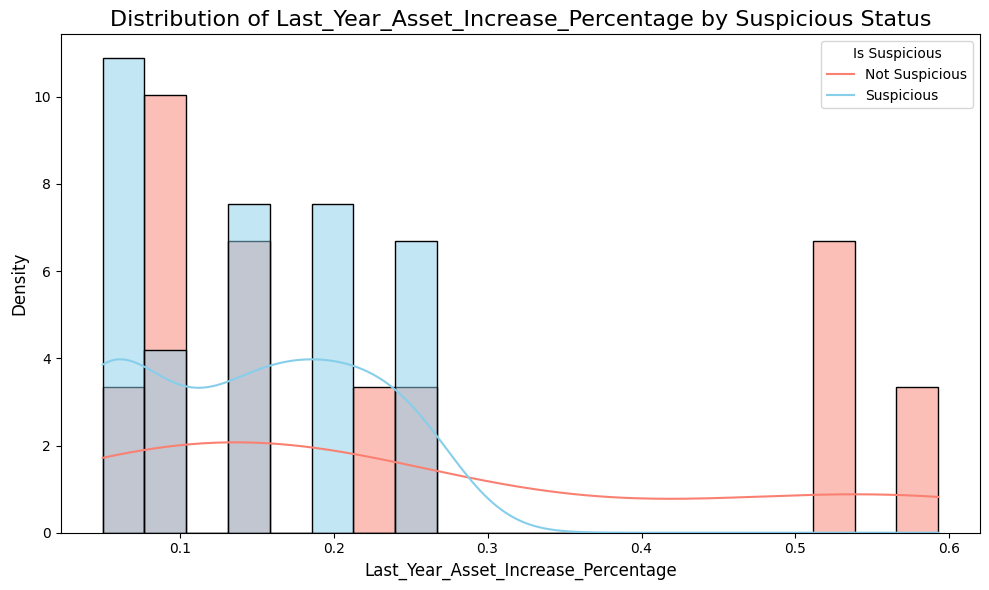

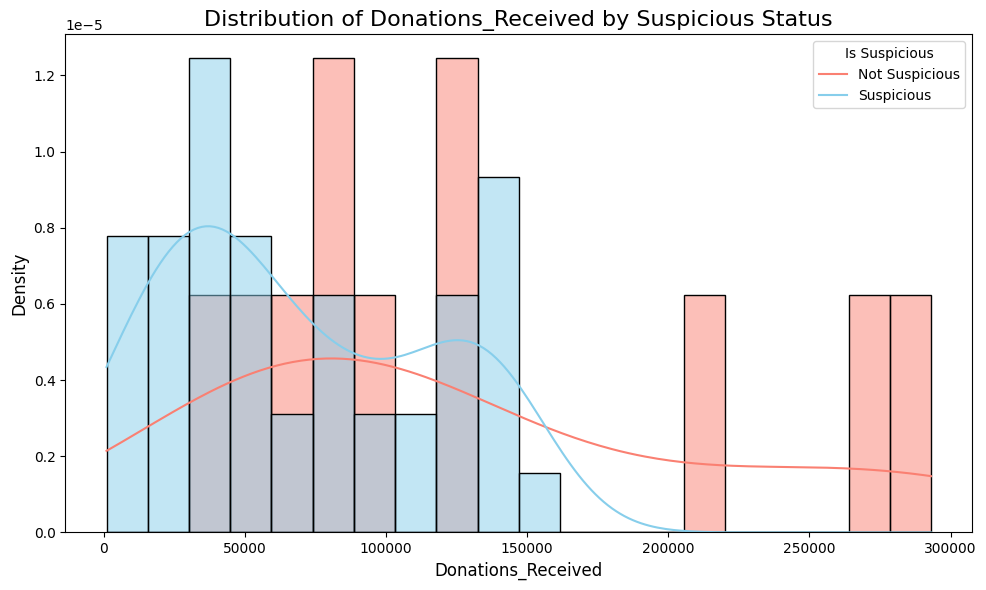

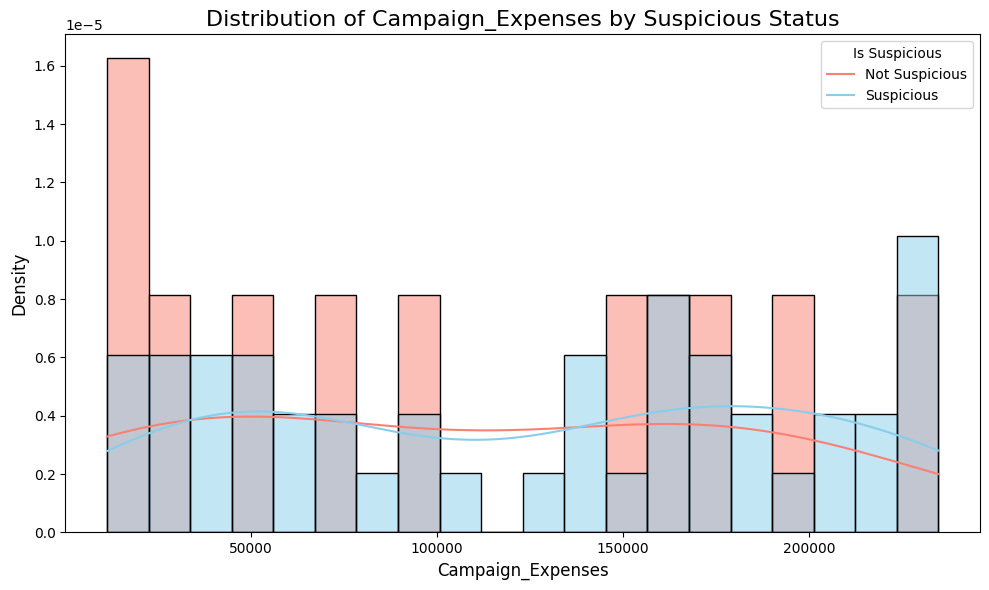

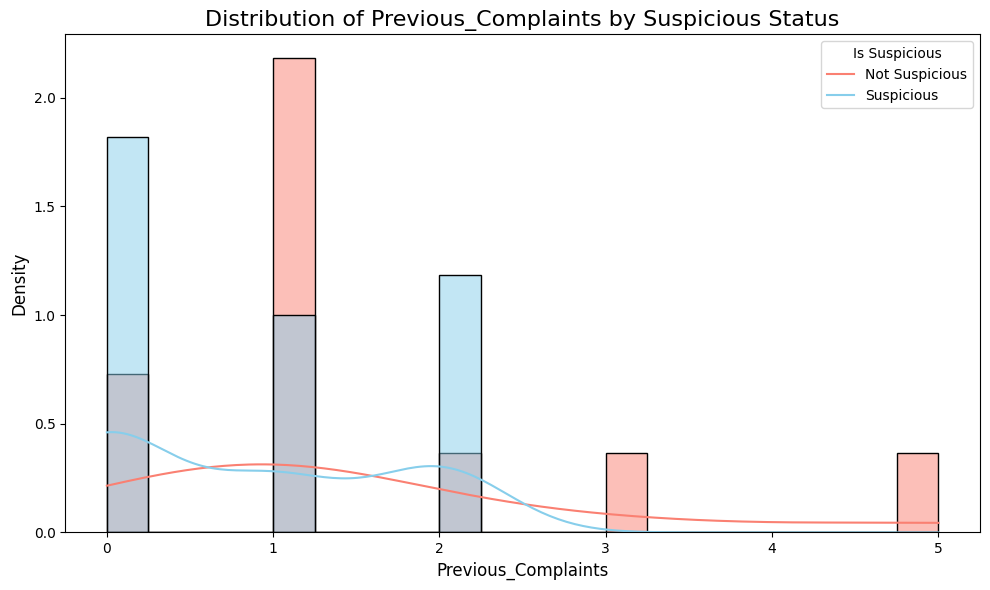

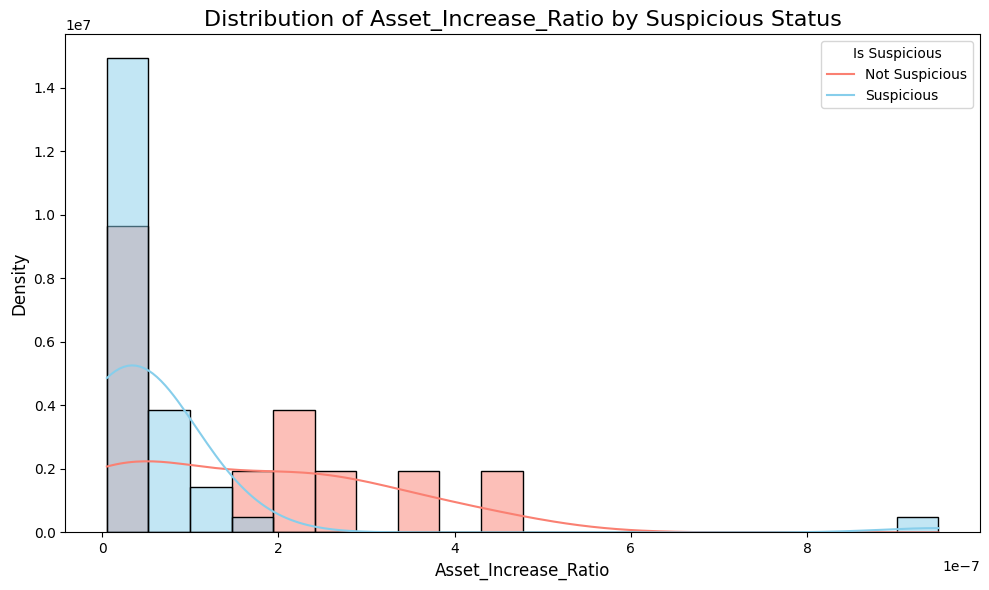

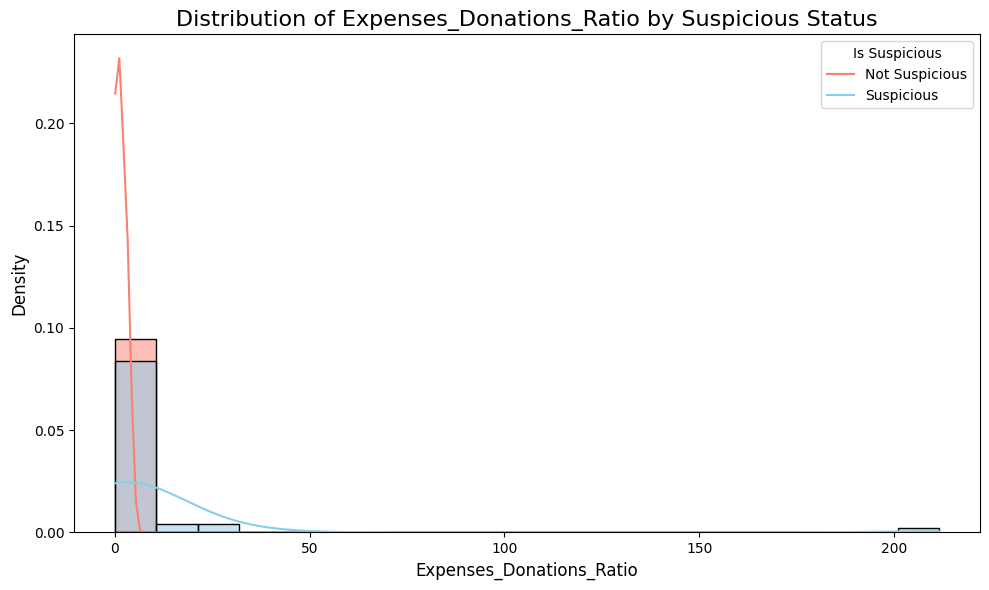

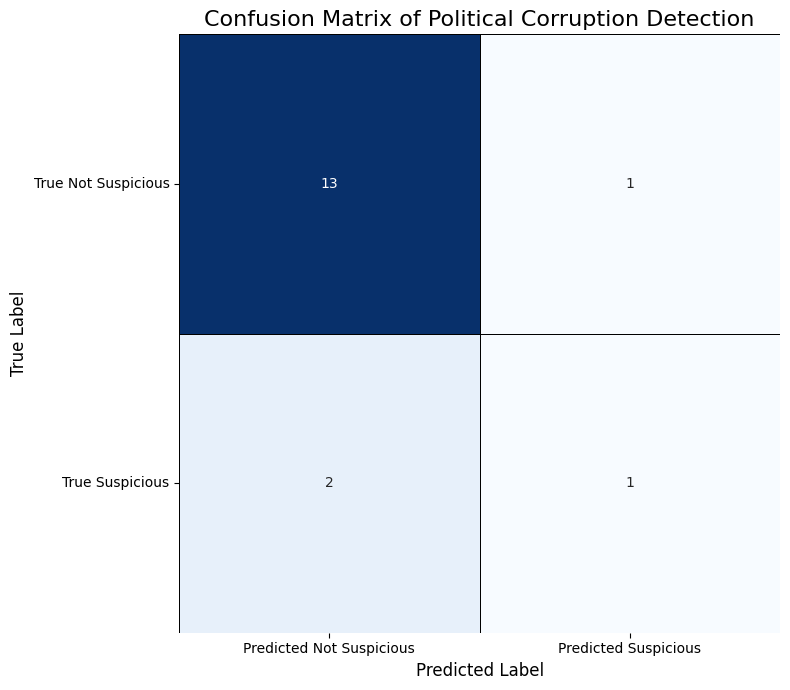


First 5 rows of the processed DataFrame:
   Politician_ID          Full_Name        Position Political_Party  \
0              1   Alexander Lawson  Representative     Short Party   
1              2     Jeffrey Reeves  Representative       Sea Party   
2              3    Steven Oconnell        Minister  Although Party   
3              4  Alexander Frazier         Senator       Far Party   
4              5     Michael Norris         Senator  Research Party   

  Activity_Period  Last_Year_Asset_Declaration  \
0       2023-2020                   3748528.49   
1       2018-2025                   9507389.49   
2       2019-2022                   7321279.45   
3       2018-2021                   5988591.55   
4       2024-2020                   1564406.31   

   Last_Year_Asset_Increase_Percentage  Donations_Received  Campaign_Expenses  \
0                                 0.20             4714.38           68093.27   
1                                 0.05            95461.56          

In [11]:
import random
from faker import Faker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Set a random seed for reproducibility
np.random.seed(42)
random.seed(42)

# 1. Generate a simulated dataset for political corruption
fake = Faker('en_US') # Using 'en_US' for English names/words

num_politicians = 55 # Number of politicians in the simulated dataset
# Generate random amounts for asset declarations
amounts = np.random.uniform(5000, 10000000, num_politicians)
formatted_amounts = [f"{amount:.2f}" for amount in amounts]

# Create the initial dataset for political figures
political_data = {
    'Politician_ID': range(1, num_politicians + 1),
    'Full_Name': [fake.name() for _ in range(num_politicians)],
    'Position': [random.choice(['Representative', 'Senator', 'Minister', 'Mayor', 'Councilor']) for _ in range(num_politicians)],
    'Political_Party': [fake.word().capitalize() + ' Party' for _ in range(num_politicians)],
    'Activity_Period': [f"{random.randint(2018, 2024)}-{random.randint(2020, 2025)}" for _ in range(num_politicians)],
    'Last_Year_Asset_Declaration': formatted_amounts,
    'Last_Year_Asset_Increase_Percentage': np.random.choice([0.05, 0.10, 0.15, 0.20, 0.25], num_politicians), # Reduced max initial increase
    'Donations_Received': np.round(np.random.uniform(0, 150000, num_politicians), 2),
    'Campaign_Expenses': np.round(np.random.uniform(10000, 250000, num_politicians), 2),
    'Business_Ties': [random.choice(['Yes', 'No', 'Declared']) for _ in range(num_politicians)],
    'Previous_Complaints': np.random.randint(0, 3, num_politicians),
    'Is_Suspicious': np.zeros(num_politicians, dtype=int)  # Initialize as not suspicious
}

df_politicians = pd.DataFrame(political_data)

# Update 'Is_Suspicious' based on a baseline set of conditions
# A politician is initially marked suspicious if:
# 1. Their asset increase percentage in the last year is greater than 10%
# 2. They have "Yes" in Business_Ties (indicating direct ties)
# 3. They have exactly 1 previous complaint
df_politicians['Is_Suspicious'] = np.where(
    (df_politicians['Last_Year_Asset_Increase_Percentage'] > 0.10) &
    (df_politicians['Business_Ties'] == 'Yes') &
    (df_politicians['Previous_Complaints'] == 1),
    1,
    0
)

# 2. Simulate additional Suspicious Cases
# We aim to make a certain percentage of politicians truly suspicious for the model to learn from.
num_suspicious_to_add = int(num_politicians * 0.15) # Target 15% of total politicians to be suspicious

# Identify non-suspicious indices to add new suspicious cases without overwriting existing ones
non_suspicious_indices = df_politicians[df_politicians['Is_Suspicious'] == 0].index
# Adjust the number of suspicious cases to add if there are fewer non-suspicious cases than requested
num_suspicious_to_add = min(num_suspicious_to_add, len(non_suspicious_indices))

# Randomly select indices from the non-suspicious ones to make them suspicious
suspicious_indices = np.random.choice(non_suspicious_indices, num_suspicious_to_add, replace=False)
df_politicians.loc[suspicious_indices, 'Is_Suspicious'] = 1

# Apply modifications to simulate common corruption patterns for the newly marked suspicious cases
for idx in suspicious_indices:
    if random.random() < 0.4: # 40% of cases: significant asset increase
        # Ensure a notable increase for suspicious cases
        df_politicians.loc[idx, 'Last_Year_Asset_Increase_Percentage'] = np.random.uniform(0.20, 0.60)
        # Also increase the declared asset value to reflect this growth
        df_politicians.loc[idx, 'Last_Year_Asset_Declaration'] = str(float(df_politicians.loc[idx, 'Last_Year_Asset_Declaration']) * np.random.uniform(1.2, 1.5))

    if random.random() < 0.3: # 30% of cases: high donations and relatively low campaign expenses
        df_politicians.loc[idx, 'Donations_Received'] = np.random.uniform(100000, 300000)
        df_politicians.loc[idx, 'Campaign_Expenses'] = np.random.uniform(5000, 50000)

    if random.random() < 0.3: # 30% of cases: Undisclosed business ties
        df_politicians.loc[idx, 'Business_Ties'] = 'Undisclosed'

    if random.random() < 0.2: # 20% of cases: Multiple previous complaints
        df_politicians.loc[idx, 'Previous_Complaints'] = random.randint(2, 5)

    if random.random() < 0.1: # 10% of cases: High-level position and extraordinary asset increase
        if df_politicians.loc[idx, 'Position'] in ['Minister', 'Senator', 'Mayor']: # Consider mayors as high-level too
            df_politicians.loc[idx, 'Last_Year_Asset_Increase_Percentage'] *= random.uniform(2.5, 4.0)


# Convert 'Last_Year_Asset_Declaration' to numeric type after all modifications
df_politicians['Last_Year_Asset_Declaration'] = df_politicians['Last_Year_Asset_Declaration'].astype(float)


# 3. Feature Engineering
# a) Ratio of Asset Increase Percentage to Total Assets (e.g., disproportionate increase relative to total wealth)
# Add a small epsilon (1e-6) to the denominator to prevent division by zero for assets close to zero
df_politicians['Asset_Increase_Ratio'] = df_politicians['Last_Year_Asset_Increase_Percentage'] / (df_politicians['Last_Year_Asset_Declaration'] + 1e-6)

# b) Ratio of Campaign Expenses to Donations (e.g., very low expenses despite high donations could be suspicious)
# Add a small epsilon (1e-6) to the denominator to prevent division by zero for zero donations
df_politicians['Expenses_Donations_Ratio'] = df_politicians['Campaign_Expenses'] / (df_politicians['Donations_Received'] + 1e-6)

# c) Binary flag: Is there a High Asset Increase (based on a threshold)?
high_increase_amount_threshold = 150000 # Define a threshold for what constitutes a "high" amount increase
df_politicians['Is_High_Asset_Increase_Amount'] = (df_politicians['Last_Year_Asset_Increase_Percentage'] * df_politicians['Last_Year_Asset_Declaration'] > high_increase_amount_threshold).astype(int)

# d) Binary flag: Are there Many Previous Complaints (based on a threshold)?
many_complaints_threshold = 1 # More than 1 complaint is considered "many"
df_politicians['Has_Many_Complaints'] = (df_politicians['Previous_Complaints'] > many_complaints_threshold).astype(int)

# e) Encode categorical variables using LabelEncoder
# 'Position'
le_position = LabelEncoder()
df_politicians['Position_Encoded'] = le_position.fit_transform(df_politicians['Position'])

# 'Political_Party'
le_party = LabelEncoder()
df_politicians['Political_Party_Encoded'] = le_party.fit_transform(df_politicians['Political_Party'])

# 'Business_Ties' - including 'Undisclosed' as a category
le_business_ties = LabelEncoder()
df_politicians['Business_Ties_Encoded'] = le_business_ties.fit_transform(df_politicians['Business_Ties'])

# 4. Feature Selection and Data Preparation
# Define the features (independent variables, X) that the model will use for prediction
features = ['Last_Year_Asset_Declaration', 'Last_Year_Asset_Increase_Percentage',
            'Donations_Received', 'Campaign_Expenses', 'Asset_Increase_Ratio',
            'Expenses_Donations_Ratio', 'Is_High_Asset_Increase_Amount', 'Has_Many_Complaints',
            'Position_Encoded', 'Political_Party_Encoded', 'Business_Ties_Encoded']
X = df_politicians[features]
# Define the target variable (dependent variable, y) which is 'Is_Suspicious'
y = df_politicians['Is_Suspicious']

# Handle any potential missing values by filling them with 0 (or a suitable strategy)
X = X.fillna(0)

# 5. Split Data into Training and Test Sets
# Stratify by 'Is_Suspicious' to ensure similar proportions of suspicious/non-suspicious cases
# in both training and test sets, which is crucial for imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 6. Feature Scaling
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
# This is important for many machine learning algorithms to perform optimally.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)     # Transform test data using the same scaler fitted on training data

# 7. Train the Classification Model (Random Forest)
print("\n7. Training the Model for Political Corruption Detection (Random Forest):")
model = RandomForestClassifier(random_state=42) # Initialize the Random Forest Classifier
model.fit(X_train_scaled, y_train)              # Train the model
y_pred = model.predict(X_test_scaled)           # Make predictions on the scaled test set

# 8. Evaluate the Model
print("\n8. Model Evaluation:")
print("Model Accuracy:", accuracy_score(y_test, y_pred)) # Calculate overall accuracy
# Generate a detailed classification report including precision, recall, f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Suspicious', 'Suspicious']))
# Compute the confusion matrix to understand prediction errors
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Analyze Politicians Detected as Suspicious
# Create a copy of the test set rows from the original DataFrame
df_test_results = df_politicians.loc[X_test.index].copy()
df_test_results['Prediction_Suspicious'] = y_pred # Add the model's predictions to this DataFrame

# Filter for politicians that the model predicted as suspicious
suspicious_politicians = df_test_results[df_test_results['Prediction_Suspicious'] == 1][
    ['Politician_ID', 'Full_Name', 'Position', 'Political_Party', 'Last_Year_Asset_Declaration',
     'Last_Year_Asset_Increase_Percentage', 'Donations_Received', 'Campaign_Expenses',
     'Business_Ties', 'Previous_Complaints', 'Is_Suspicious', 'Prediction_Suspicious']
]
print("\n9. Politicians Detected as Potentially Suspicious by the System:")
print(suspicious_politicians)

# 10. Feature Importance Analysis
print("\n10. Feature Importance (from RandomForestClassifier):")
if hasattr(model, 'feature_importances_'): # Check if the model has feature_importances_ attribute
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    print(feature_importances)

    # --- Plotting Feature Importance ---
    plt.figure(figsize=(10, 7))
    sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
    plt.title('Feature Importance for Political Corruption Detection', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 11. Visualizations for Data Exploration and Model Insights

# --- Plot 1: Distribution of 'Is_Suspicious' (Target Variable) ---
plt.figure(figsize=(7, 6))
sns.countplot(x='Is_Suspicious', data=df_politicians, palette='cividis')
plt.title('Distribution of Suspicious vs. Non-Suspicious Cases', fontsize=16)
plt.xlabel('Suspicious Status (0: Not Suspicious, 1: Suspicious)', fontsize=12)
plt.ylabel('Number of Politicians', fontsize=12)
plt.xticks([0, 1], ['Not Suspicious', 'Suspicious'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Distribution of key numerical features by 'Is_Suspicious' ---
# Helps to visually identify patterns where suspicious cases differ from non-suspicious ones
numerical_features_to_plot = [
    'Last_Year_Asset_Increase_Percentage',
    'Donations_Received',
    'Campaign_Expenses',
    'Previous_Complaints',
    'Asset_Increase_Ratio',
    'Expenses_Donations_Ratio'
]

for feature in numerical_features_to_plot:
    plt.figure(figsize=(10, 6))
    # Corrected: Use integer keys for the palette dictionary
    sns.histplot(data=df_politicians, x=feature, hue='Is_Suspicious', kde=True,
                 palette={0: 'skyblue', 1: 'salmon'},  # Corrected: Use integer keys
                 stat='density', common_norm=False, bins=20)
    plt.title(f'Distribution of {feature} by Suspicious Status', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(title='Is Suspicious', labels=['Not Suspicious', 'Suspicious'])
    plt.tight_layout()
    plt.show()

# --- Plot 3: Confusion Matrix Heatmap ---
# Provides a clear visual representation of True Positives, True Negatives, False Positives, and False Negatives
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5, linecolor='black',
            xticklabels=['Predicted Not Suspicious', 'Predicted Suspicious'],
            yticklabels=['True Not Suspicious', 'True Suspicious'])
plt.title('Confusion Matrix of Political Corruption Detection', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()

# Save the final DataFrame to a CSV file (optional)
# csv_file_name = 'df_politicians_processed.csv'
# df_politicians.to_csv(csv_file_name, index=False)
# print(f"\nFinal processed DataFrame saved to '{csv_file_name}'")

# Display the first few rows of the processed DataFrame to check features
print("\nFirst 5 rows of the processed DataFrame:")
print(df_politicians.head())